In [24]:
import pyzed.sl as sl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
svo_path = '../data/VGA_SN35520970_15-39-15.svo'

In [26]:
zed = sl.Camera()

# init parameters
init_params = sl.InitParameters()
init_params.set_from_svo_file(svo_path)
init_params.depth_mode = sl.DEPTH_MODE.ULTRA
init_params.coordinate_units = sl.UNIT.METER
init_params.depth_maximum_distance = 40
init_params.depth_minimum_distance = 1
init_params.sdk_verbose = True

zed.open(init_params)

SUCCESS

In [27]:
# init detection parameters
detection_parameters = sl.ObjectDetectionParameters()

detection_parameters.image_sync = True
detection_parameters.enable_tracking = True
detection_parameters.enable_segmentation = True

detection_parameters.detection_model = sl.OBJECT_DETECTION_MODEL.MULTI_CLASS_BOX_ACCURATE

if detection_parameters.enable_tracking:
    zed.enable_positional_tracking()

zed.enable_object_detection(detection_parameters)

detection_confidence = 10
detection_parameters_rt = sl.ObjectDetectionRuntimeParameters(detection_confidence)

detection_parameters_rt.object_class_filter = [sl.OBJECT_CLASS.PERSON, sl.OBJECT_CLASS.SPORT]

In [28]:
detected_objects = sl.Objects()
runtime_parameters = sl.RuntimeParameters()

detected_objects_list = []

Current frame:  0


C:\Users\denis\AppData\Local\Temp\ipykernel_24908\1458520620.py:18: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(left_image.get_data())
C:\Users\denis\AppData\Local\Temp\ipykernel_24908\1458520620.py:18: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(left_image.get_data())
C:\Users\denis\AppData\Local\Temp\ipykernel_24908\1458520620.py:20: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(right_image.get_data())
C:\Users\denis\AppData\Local\Temp\ipykernel_24908\1458520620.py:20: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(right_image.get_data())


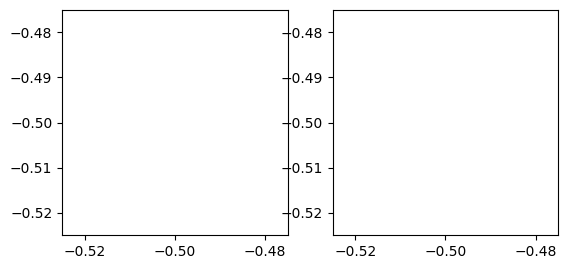

In [23]:
left_image = sl.Mat()
right_image = sl.Mat()
zed.set_svo_position(300)
print("Current frame: ", zed.get_svo_position())

# Loop if we reached frame 50



# Grab an image
if zed.grab() == sl.ERROR_CODE.SUCCESS:
    zed.retrieve_image(left_image, sl.VIEW.LEFT)
    zed.retrieve_image(right_image,sl.VIEW.RIGHT)


# Use the image in your application
plt.subplot(1,2,1)
plt.imshow(left_image.get_data())
plt.subplot(1,2,2)
plt.imshow(right_image.get_data())
plt.show()

    
zed.set_svo_position(0)
zed.retrieve_image(left_image, sl.VIEW.LEFT)
zed.close()

**Tennisballerkennung trainieren**

In [7]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
#from yolo import YOLO
from ultralytics import YOLO
import tqdm
import torch
from torch.utils.data import DataLoader

from PIL import Image
import requests

epochs = 100
yolov5 = YOLO("yolov5n.pt")
yolov5.load()



yolov5.train(data='Batch1/data.yaml', epochs=epochs, imgsz=640, verbose=True)




PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.
Transferred 115/427 items from pretrained weights
New https://pypi.org/project/ultralytics/8.0.229 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.228 🚀 Python-3.11.5 torch-2.1.2+cpu CPU (11th Gen Intel Core(TM) i7-11370H 3.30GHz)
engine\trainer: task=detect, mode=train, model=yolov5n.pt, data=Batch1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropou

train: Scanning C:\FHNW_Programmiersachen\3_Sem\fhnw-cda2-tennis-analysis\ball_detection\Batch1\train\labels.cache... 392 images, 0 backgrounds, 0 corrupt: 100%|██████████| 392/392 [00:00<?, ?it/s]
val: Scanning C:\FHNW_Programmiersachen\3_Sem\fhnw-cda2-tennis-analysis\ball_detection\Batch1\valid\labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/25 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [22]:
from ultralytics import YOLO
from PIL import Image

yolov5 = YOLO("yolov5n.pt")
yolov5.load()

#yolov5.train(data='Batch1/data.yaml', epochs=epochs, imgsz=640, verbose=True)

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.
Transferred 115/427 items from pretrained weights


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_st

In [23]:
image = yolov5.predict("left000359.png")

FileNotFoundError: left000359.png does not exist

In [ ]:
r = image[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
im.show()  # show image
im.save('left000359.png')


In [ ]:
print(r.probs)

In [ ]:
print(r.boxes)